In [3]:
import pandas as pd
import numpy as np

In [4]:
train=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\sarita\\train.csv.zip')

In [5]:
test=pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\sarita\\test.csv (1).zip')

In [13]:
train.shape

(4658147, 6)

In [6]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658147 entries, 0 to 4658146
Data columns (total 6 columns):
id                          int64
molecule_name               object
atom_index_0                int64
atom_index_1                int64
type                        object
scalar_coupling_constant    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.2+ MB


In [9]:
train.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
dtype: int64

In [14]:
test.shape

(2505542, 5)

In [7]:
test.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505542 entries, 0 to 2505541
Data columns (total 5 columns):
id               int64
molecule_name    object
atom_index_0     int64
atom_index_1     int64
type             object
dtypes: int64(3), object(2)
memory usage: 95.6+ MB


In [11]:
test.isnull().sum()

id               0
molecule_name    0
atom_index_0     0
atom_index_1     0
type             0
dtype: int64

In [15]:
train['molecule_name'].nunique()

85003

In [16]:
test['molecule_name'].nunique()

45772

In [17]:
train['type'].nunique()

8

In [18]:
test['type'].nunique()

8

So in out main data files we have information about moleculas and pairs of atoms

test set is ~2 times smaller that train set;
we have 5 unique atoms and 8 coupling types;

In [19]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.658147e+06,4.658147e+06,4.658147e+06,4.658147e+06
mean,2.329073e+06,1.335689e+01,5.883966e+00,1.592165e+01
std,1.344691e+06,3.267712e+00,4.993943e+00,3.494198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.621860e+01
25%,1.164536e+06,1.100000e+01,2.000000e+00,-2.549780e-01
50%,2.329073e+06,1.300000e+01,5.000000e+00,2.281130e+00
75%,3.493610e+06,1.600000e+01,8.000000e+00,7.390655e+00
max,4.658146e+06,2.800000e+01,2.800000e+01,2.048800e+02


In [20]:
test.describe()

,id,atom_index_0,atom_index_1
count,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.335449e+01,5.877949e+00
std,7.232878e+05,3.272209e+00,4.992313e+00
min,4.658147e+06,1.000000e+00,0.000000e+00
25%,5.284532e+06,1.100000e+01,2.000000e+00
50%,5.910918e+06,1.300000e+01,5.000000e+00
75%,6.537303e+06,1.600000e+01,8.000000e+00
max,7.163688e+06,2.800000e+01,2.800000e+01


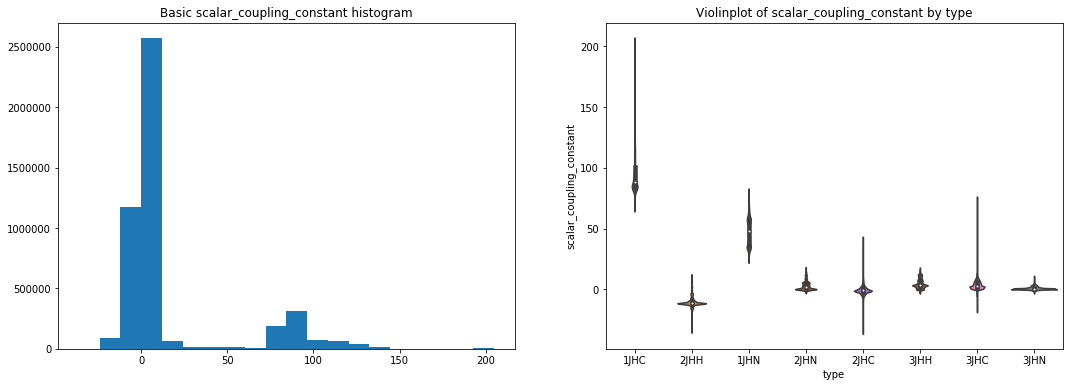

In [26]:
import math
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(train['scalar_coupling_constant'], bins=20);
plt.title('Basic scalar_coupling_constant histogram');
plt.subplot(1, 2, 2);
sns.violinplot(x='type', y='scalar_coupling_constant', data=train);
plt.title('Violinplot of scalar_coupling_constant by type');

There are many interesting things here:

1. among first atoms there is a little number of atoms with index lower than 7 or higher than 24;
2. among second atoms there is a little number of atoms with index higher than 24. Also index with atom with index 9 in quite rare;
3. coupling types are unevenly distributed. There are 3 very popular, 3 quite rare and 2 with medium frequency;
4. target variable has a bimodal distribution;
5. different coupling types have really different values of target variable. Maybe it would make sense to build separate models for each of them;

Plotting network graphs by type
We have molecules, atom pairs, so this means data, which is interconnected. Network graphs should be useful to visualize such data!

C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\praty\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\U

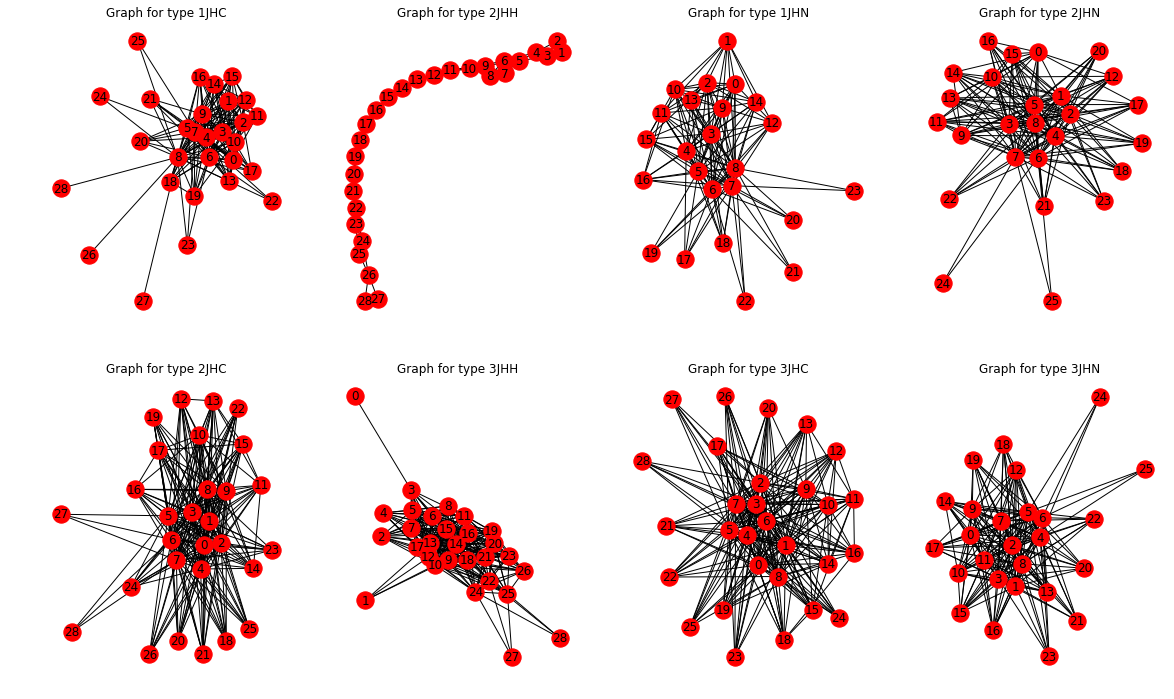

In [28]:
import networkx as nx
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(train['type'].unique()):
    train_type = train.loc[train['type'] == t]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

We can see that atom connections have different shapes for different types. Type 2JHH has an expecially unique scheme. Also we can see that some atoms are connected only to several other atoms.